In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import math
import seaborn as sns
import statsmodels.api as sm

In [2]:
url = "https://raw.githubusercontent.com/akristianto03/carPricesDataset/main/CarPrice_Assignment.csv"
car_data = pd.read_csv(url)

#Selecting the used data
used_data = car_data[["car_ID",	"symboling",	"CarName",	"fueltype",	"aspiration",	"doornumber",	"carbody",	"drivewheel",	
                      "enginelocation",	"wheelbase",	"carlength",	"carwidth",	"carheight",	"curbweight",	"enginetype",	
                      "cylindernumber",	"enginesize",	"fuelsystem",	"boreratio",	"stroke",	"compressionratio",	"horsepower",	
                      "peakrpm",	"citympg",	"highwaympg",	"price"]]
used_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# I.INTRODUCTION

## a.Background and purpose of the project
There has been a consistent increase in the used cars industry from the past decade as there is an increase in the usage of cars. Used cars are attracting more attention as they are affordable than new ones.This situation demands high-performance algorithms that can be used to predict prices for the used cars. Many machine learning algorithms are used to predict the price of cars.

## b.Objective of the analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

## c.Overview of the datasource and varaible
The dataset we are going to use in this article is a car specifications data from Kaggle (https://www.kaggle.com/hellbuoy/car-price-prediction). Ranging from fuel, to length and horsepower, a dataset with 21 features of a car.

# II.Data acquisition and cleaning

## a.Data sourcing and importing

In [3]:
used_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


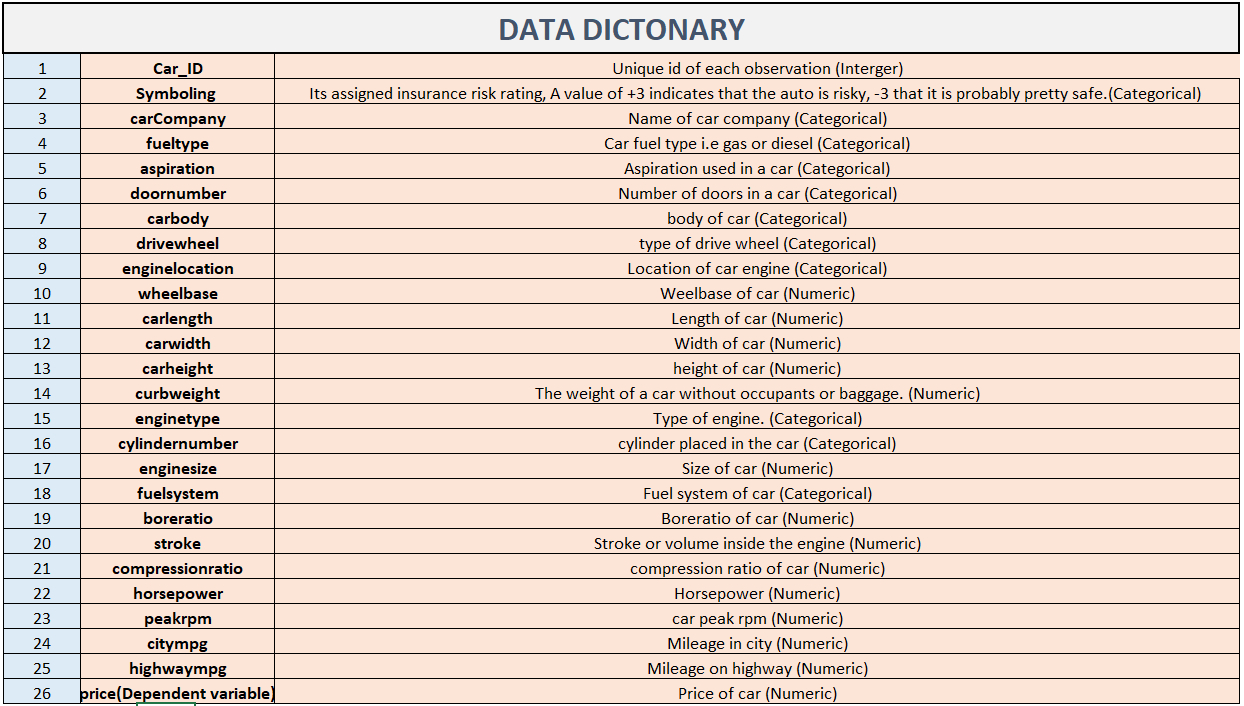

## b.Data cleaning and preprocessing

In [4]:
used_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
used_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
used_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## c.Data quality asseseement
A data quality assessment (DQA) is a process that can be used to assess the quality of a data set. The DQA helps in identifying where there are gaps in the data, which can be filled by the data providers.
Data quality assessment can help organizations improve their data quality and avoid costly mistakes. It also helps them make better decisions by providing insights into how their data is being used.
The three key factors when assessing data quality are accuracy, completeness, and timeliness.

# III.Data exploration and visualization


## a.Univariate analysis


In [7]:
used_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


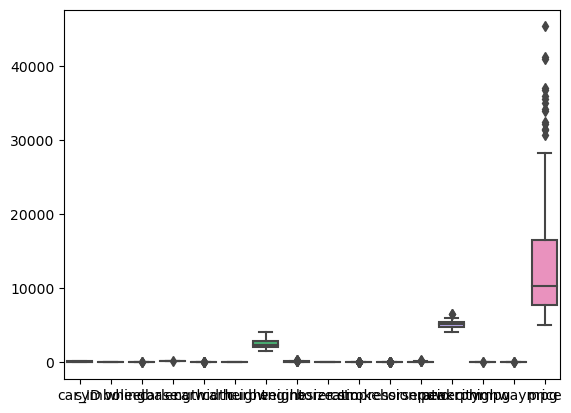

In [9]:

sns.boxplot(data=used_data);

## b.Multivariate

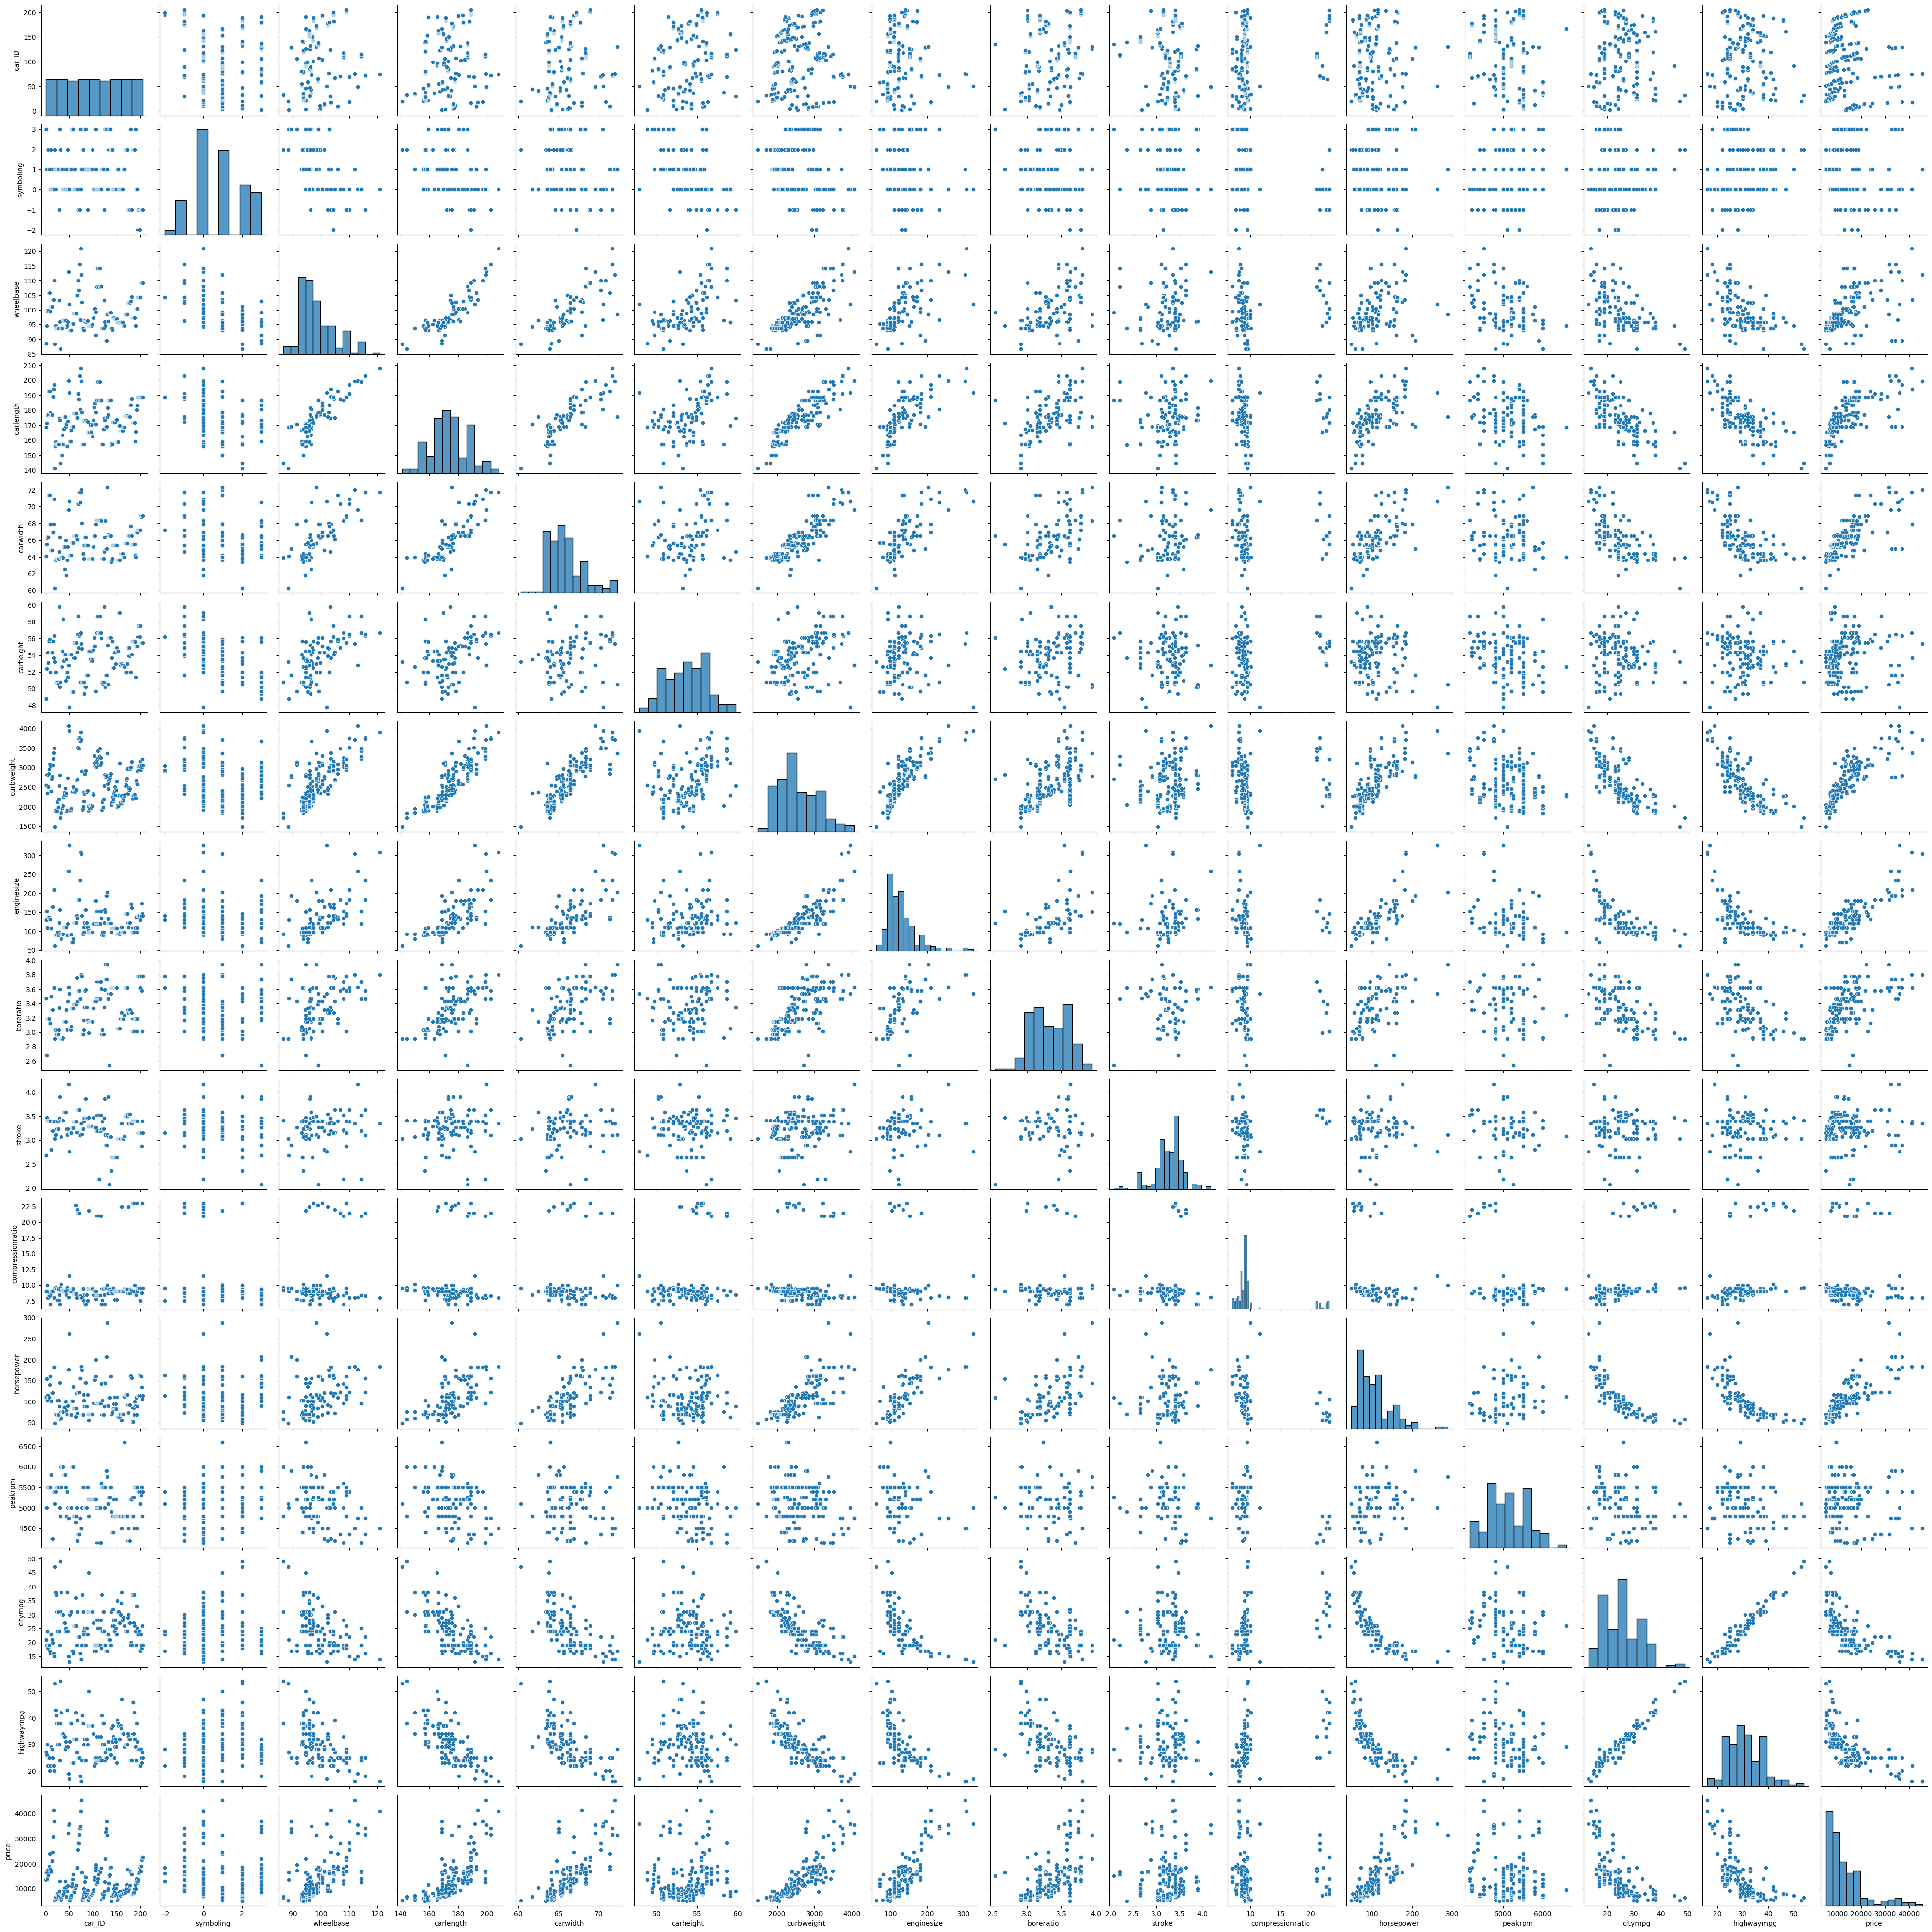

In [10]:
sns.pairplot(data=used_data)
plt.show()

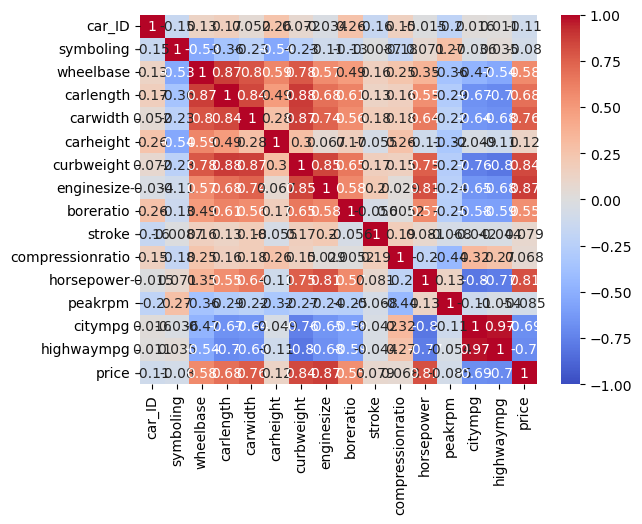

In [11]:
sns.heatmap(used_data.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

# IV. Feature engineering

## a. Feature extraction

Formatting the data into numericals.

In [12]:
pclass_FuelSystem = {'mpfi': 0, '2bbl': 1, 'mfi': 2,'1bbl': 3, 'spfi': 4, 'idi': 5}
used_data['fuelsystem'] = used_data['fuelsystem'].map(pclass_FuelSystem)   
pclass_cylinderNumber = {'zero': 0, 'one': 1, 'two': 2,'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8,'nine': 9}
used_data['cylindernumber'] = used_data['cylindernumber'].map(pclass_cylinderNumber)   
pclass_engineType = {'dohc': 0, 'ohcv': 1, 'ohc': 2,'l': 3, 'rotor': 4, 'dohcv': 5}
used_data['enginetype'] = used_data['enginetype'].map(pclass_engineType)
pclass_engineLocation = {'front': 0, 'rear': 1}
used_data['enginelocation'] = used_data['enginelocation'].map(pclass_engineLocation)     
pclass_driveWheel = {'rwd': 0, 'fwd': 1, '4wd': 2}
used_data['drivewheel'] = used_data['drivewheel'].map(pclass_driveWheel)  
used_data.replace({'fueltype': {'gas': 0, 'diesel': 1}}, inplace=True)
used_data.replace({'aspiration': {'std': 0, 'turbo': 1}}, inplace=True)
used_data.replace({'doornumber': {'two': 0, 'four': 1}}, inplace=True)
used_data.replace({'carbody': {'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop':4}}, inplace=True)
used_data.dropna(inplace=True)


In [13]:
used_data['CarName'].replace(to_replace=r'alf.+', value='alfa', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'aud.+', value='audi', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'bmw.+', value='bmw', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'chev.+', value='chevrolet', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'dodge.+', value='dodge', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'hondci.+', value='civic', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'hondacc.+', value='accord', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'j.+', value='jaguar', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'isuz.+', value='isuzu', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'max.+', value='mazda', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'maz.+', value='mazda', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'buic.+', value='buick', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'mitsu.+', value='mitsubishi', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'N.+', value='nissan', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'niss.+', value='nissan', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'peug.+', value='peugeot', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'ply.+', value='plymouth', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'por.+', value='porsche', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'ren.+', value='renault', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'saab.+', value='saab', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'suba.+', value='subaru', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'toyota corol.+', value='toyota corolla', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'toyota coron.+', value='toyota corona', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'toyota cel.+', value='toyota celica', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'volk.+', value='volkswagen', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'voks.+', value='volkswagen', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'volv.+', value='volvo', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'vw.+', value='volkswagen', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'honda a.+', value='honda accord', regex=True, inplace=True),
used_data['CarName'].replace(to_replace=r'honda c.+', value='honda civic', regex=True, inplace=True),
used_data.replace({'CarName': {'alfa': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'dodge': 4, 'honda civic': 5,
       'honda accord': 6, 'honda prelude': 7, 'isuzu': 8, 'jaguar': 9, 'mazda': 10,
       'buick': 11, 'mercury cougar': 12, 'mitsubishi': 13, 'nissan': 14, 'peugeot': 15,
       'plymouth': 16, 'porsche': 17, 'renault': 18, 'saab': 19, 'toyota corona': 20,
       'toyota corolla': 21, 'toyota carina': 22, 'toyota mark ii': 23,
       'toyota celica': 24, 'toyota starlet': 25, 'toyota tercel': 26,
       'toyota cressida': 27, 'toyouta tercel': 28, 'volkswagen': 29, 'volvo': 30}}, inplace=True)

In [14]:
X = used_data.iloc[:, :-1] #every feature except the rightmost column
y = used_data.iloc[:, -1] #only the rightmost column (car price)
print(X.head)

<bound method NDFrame.head of      car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         1          3        0         0           0           0        0   
1         2          3        0         0           0           0        0   
2         3          1        0         0           0           0        1   
3         4          2        1         0           0           1        2   
4         5          2        1         0           0           1        2   
..      ...        ...      ...       ...         ...         ...      ...   
200     201         -1       30         0           0           1        2   
201     202         -1       30         0           1           1        2   
202     203         -1       30         0           0           1        2   
203     204         -1       30         1           1           1        2   
204     205         -1       30         0           1           1        2   

     drivewheel  enginelocation  

## b.Feature selection
Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models.

Best alpha using built-in LassoCV: 3607.634262
Best score using built-in LassoCV: 0.848054
Lasso picked 5 variables and eliminated the other 20 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

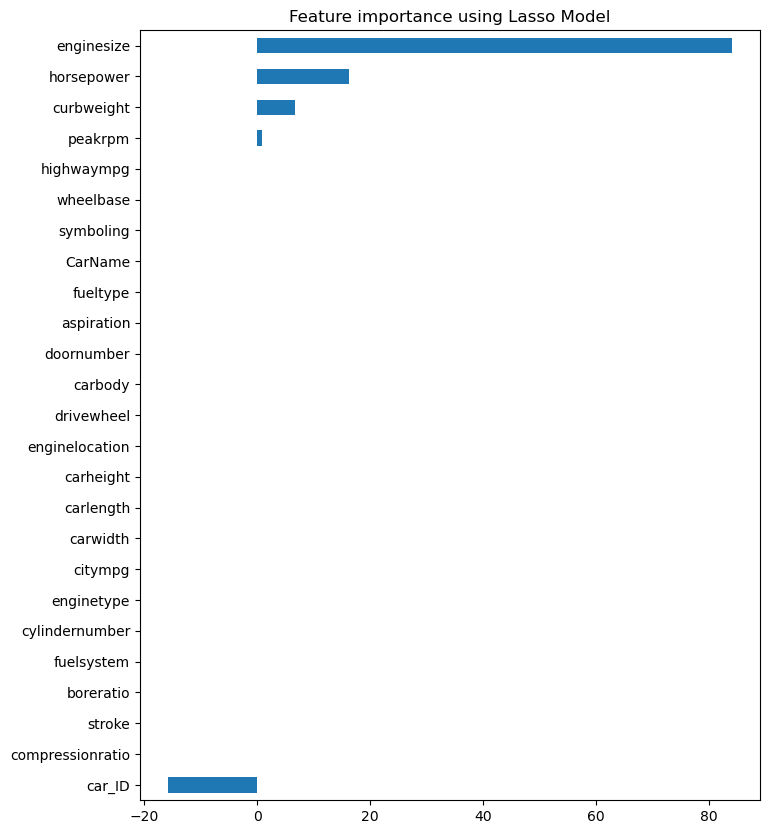

In [15]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns )
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [42]:
selected_data = used_data[["enginesize","horsepower","curbweight","peakrpm","price"]]
X = selected_data.iloc[:, :-1]
y = selected_data.iloc[:, -1]
print(selected_data)

     enginesize  horsepower  curbweight  peakrpm    price
0           130         111        2548     5000  13495.0
1           130         111        2548     5000  16500.0
2           152         154        2823     5000  16500.0
3           109         102        2337     5500  13950.0
4           136         115        2824     5500  17450.0
..          ...         ...         ...      ...      ...
200         141         114        2952     5400  16845.0
201         141         160        3049     5300  19045.0
202         173         134        3012     5500  21485.0
203         145         106        3217     4800  22470.0
204         141         114        3062     5400  22625.0

[177 rows x 5 columns]


In order to ubderstand the data after the feature slection, i do the EDA again.

## Univariate

In [43]:
selected_data.describe()

,enginesize,horsepower,curbweight,peakrpm,price
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,126.909605,101.644068,2563.514124,5113.841808,13244.619588
std,39.897636,37.551221,539.559491,472.172130,7801.679717
min,61.000000,48.000000,1488.000000,4150.000000,5151.000000
25%,97.000000,70.000000,2122.000000,4800.000000,7788.000000
50%,120.000000,92.000000,2443.000000,5200.000000,10345.000000
75%,141.000000,116.000000,3016.000000,5500.000000,16630.000000
max,308.000000,288.000000,4066.000000,6600.000000,45400.000000


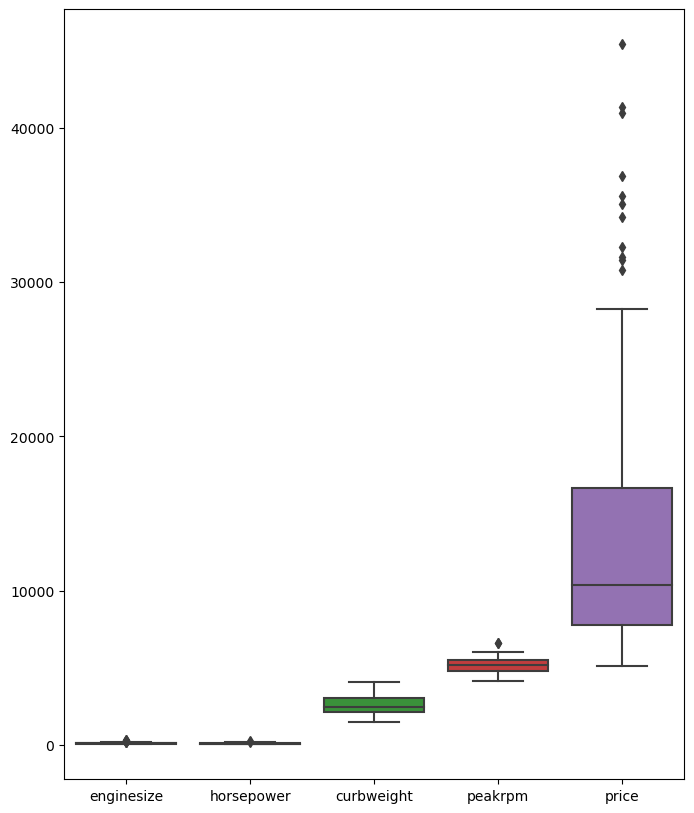

In [44]:
sns.boxplot(data=selected_data);

## Multivariate

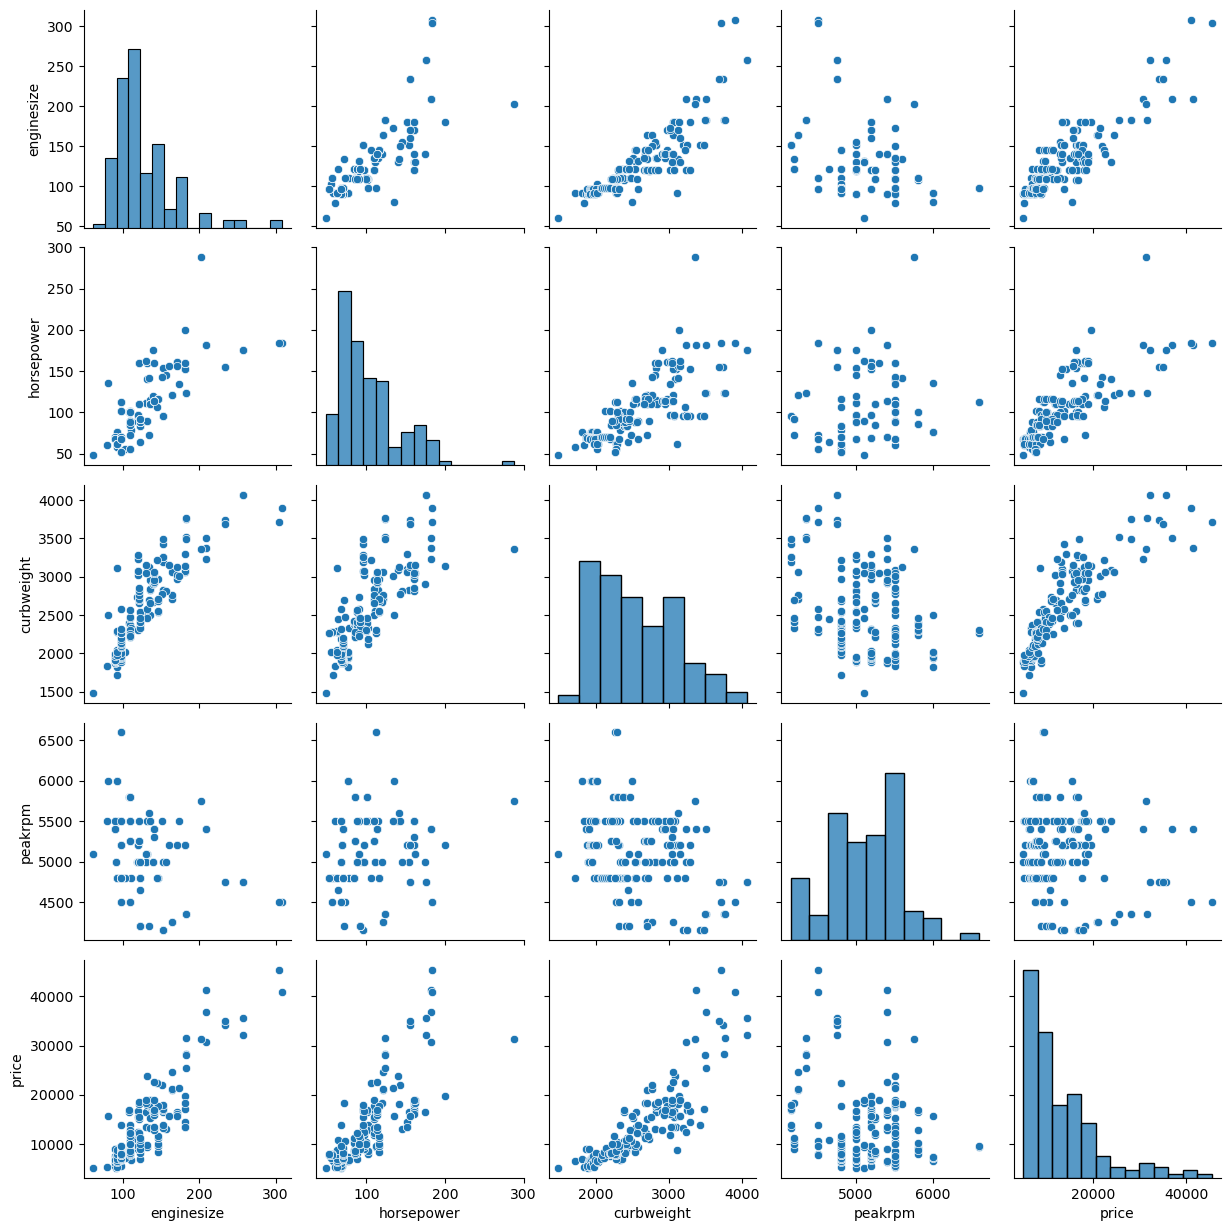

In [45]:
sns.pairplot(data=selected_data)
plt.show()

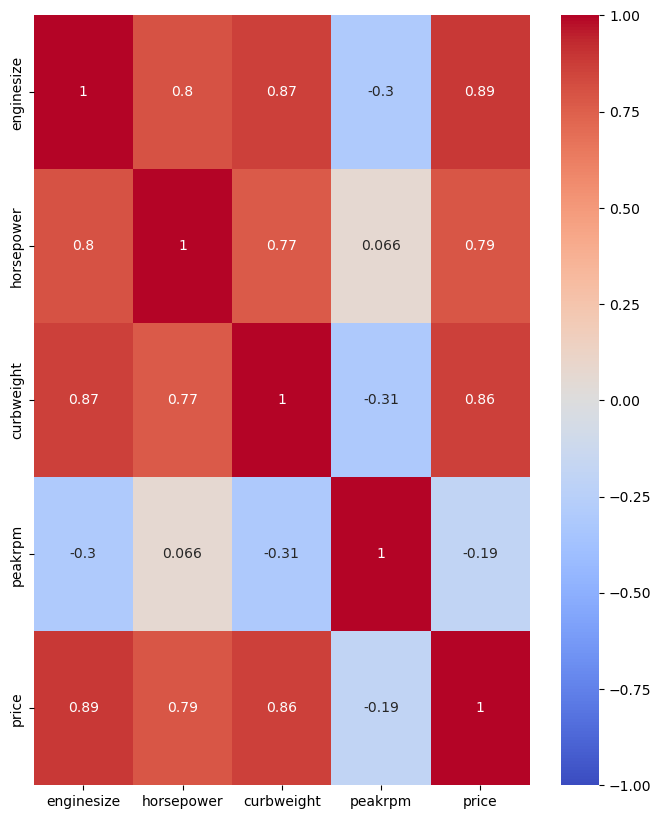

In [46]:
sns.heatmap(selected_data.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

I need to remove the outliers before we do the model selection and analysis.

In [47]:
print("Old Shape: ", selected_data.shape) 

Old Shape:  (177, 5)


In [48]:
print("Old Shape: ", selected_data.shape) 
Q1 = np.percentile(selected_data['enginesize'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(selected_data['enginesize'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
  
# Upper bound
upper = np.where(selected_data['enginesize'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(selected_data['enginesize'] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
selected_data.drop(upper[0], inplace = True)
selected_data.drop(lower[0], inplace = True)
print("New Shape: ", selected_data.shape)

Old Shape:  (177, 5)
New Shape:  (168, 5)


C:\Users\User\AppData\Local\Temp\ipykernel_8164\4227946151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop(upper[0], inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_8164\4227946151.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop(lower[0], inplace = True)


In [49]:
Q1 = np.percentile(selected_data['price'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(selected_data['price'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
    
# Upper bound
upper = np.where(selected_data['price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(selected_data['price'] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
selected_data.drop(upper[0], inplace = True)
selected_data.drop(lower[0], inplace = True)

  

C:\Users\User\AppData\Local\Temp\ipykernel_8164\3726798245.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop(upper[0], inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_8164\3726798245.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop(lower[0], inplace = True)


In [50]:
Q1 = np.percentile(selected_data['curbweight'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(selected_data['curbweight'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
    
# Upper bound
upper = np.where(selected_data['curbweight'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(selected_data['curbweight'] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
selected_data.drop(upper[0], inplace = True)
selected_data.drop(lower[0], inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_8164\619232220.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop(upper[0], inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_8164\619232220.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.drop(lower[0], inplace = True)


In [51]:
print("New Shape: ", selected_data.shape) 

New Shape:  (163, 5)


# V.Model development

## a.Model selection
Regression or a regression model are used to describe the relationship between two variables and allows you to estimate how a dependent variable changes as the independent variable(s) changes.



## b.Model training and validation

In [52]:
#Getting train and test data 
train, test = train_test_split(selected_data,train_size=0.8)

# Train
X_train = train[["enginesize","horsepower","curbweight","peakrpm"]]
y_train = train["price"]
line = LinearRegression()
line.fit(X_train, y_train)

# Predict
X_test = test[["enginesize","horsepower","curbweight","peakrpm"]]
y_test = test["price"]


y_pred = line.predict(X_test)

from sklearn.preprocessing import StandardScaler

#so that the measurements are all fair, the units are all the same
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting the data into  a linear regression model.

In [53]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_[0])
print(regressor.coef_[1])
print(regressor.coef_[2])
print(regressor.coef_[3])

12109.639746153845
3301.108296231356
727.8348386936063
2124.5542854381724
524.8743424067343


In [54]:
#Prediction 1
print(regressor.predict([[131, 140, 3086, 5500]]))
#Prediction 2
print(regressor.predict([[122, 64, 2443, 4650]]))
#Prediction 3
print(regressor.predict([[171, 161, 2976, 5200]]))

[9989635.1120688]
[8092378.09307954]
[9745800.70141041]


## c.Model evaluation

In [55]:
evaluate = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), 
                                        y_test.values.reshape(len(y_test),1)),1), 
                        columns=["Prediction", "Test"])
evaluate.head()

,Prediction,Test
0,409.016976,5151.0
1,10938.931528,16925.0
2,9495.247569,10698.0
3,5631.237245,5348.0
4,18070.245075,24565.0


OLS(Ordinary Least Square)

In [56]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     136.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.09e-44
Time:                        16:27:28   Log-Likelihood:                -1212.8
No. Observations:                 130   AIC:                             2436.
Df Residuals:                     125   BIC:                             2450.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.211e+04    243.795     49.671      0.0

RMSE (Root Mean Squared Error)

In [57]:
#Calculate RMSE
difference = np.subtract(y_test, y_pred)
squared = np.square(difference)
mse = squared.mean()
print("MSE : " + str(mse))
rmse = math.sqrt(mse)
print("RMSE : " + str(rmse))

MSE : 10268811.467346687
RMSE : 3204.498629637199


MAPE(Mean Absolute Percentage Error)

In [58]:
#Calculate MAPE
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

239990.3817823916


In [59]:
#Calculate MAPE
def calMape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

calMape(y_test, y_pred)

19.24880495628849

# VI.Conclusions and Recommedations

## a.Summary of finding
The following are criteria that can be used as benchmarks for MAPE measurements:

<10% = very accurate

10–20% = good

20–50% = reasonable

>50% = inaccurate

It can be concluded that the MAPE results from the linear regression model that have been made show good results.



## b.Interpretation of the result

## c. Future work
For future work, this study can be further extended in ways:

• More ML algorithms can be used to perform predictions rather than limiting
to few algorithms.

• To improve the performance some Deep learning architectures like Artificial
Neural Networks and Multi-Layer Perceptron can be used.

• Not only feature region, but how other features also impacts the price prediction can also be investigated.

• Instead of limiting a dataset to a single category like cars, it can be extended
to collection of different vehicles